<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>


# Sommaire

## [Etape 1 - Importation des librairies et chargement des fichiers](#etape1)

### [1.1 - Importation des librairies](#import_librairies)
### [1.2 - Chargement des fichiers Excel](#chargement_fichiers)

## [Etape 2 - Analyse exploratoire des fichiers](#etape2)

### [2.1 - Analyse exploratoire du fichier population](#analyse_population)
### [2.2 - Analyse exploratoire du fichier disponibilité alimentaire](#analyse_disponibilite_alimentaire)
### [2.3 - Analyse exploratoire du fichier aide alimentaire](#analyse_aide_alimentaire)
### [2.4 - Analyse exploratoire du fichier sous nutrition](#analyse_sous_nutrition)

## [Etape 3 - Analyse et calculs](#etape3)

### [3.1 - Proportion de personnes en sous nutrition](#proportion_sous_nutrition)
### [3.2 - Nombre théorique de personne qui pourrait être nourries](#nombre_theorique_personnes)
### [3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux](#nombre_theorique_personnes_vegetaux)
### [3.4 - Utilisation de la disponibilité intérieure](#utilisation_dispo_interieure)
### [3.5 - Utilisation des céréales](#utilisation_cereales)
### [3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017](#proportion_forte_sous_nutrition)
### [3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013](#pays_plus_aide)
### [3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016](#evolution_aide_alimentaire)
### [3.9 - Pays avec le moins de disponibilité par habitant](#moins_dispo_habitant)
### [3.10 - Pays avec le plus de disponibilité par habitant](#plus_dispo_habitant)
### [3.11 - Exemple de la Thaïlande pour le Manioc](#exemple_thailande_manioc)

## [Etape 4 - Analyse complémentaires](#etape4)


# <a id="etape1"></a>
<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

# <a id="import_librairies"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# <a id="chargement_fichiers"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [3]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

# <a id="etape2"></a>
<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

# <a id="analyse_population"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [4]:
#Afficher les dimensions du dataset

print("Le tableau population comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau population comporte {} colonne(s)".format(population.shape[1]))

Le tableau population comporte 1416 observation(s) ou article(s)
Le tableau population comporte 3 colonne(s)


In [5]:
#Consulter infos du dataframe

population.info()

#La nature des données dans chacune des colonnes

population.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


Zone       object
Année       int64
Valeur    float64
dtype: object

In [6]:
#Valeur minimum de la colonne "Année"

Valeur_min = population["Année"].min()
print("La valeur minimum de la colonne Valeur est de:", Valeur_min)

La valeur minimum de la colonne Valeur est de: 2013


In [7]:
#Valeur maximum de la colonne "Année"

Valeur_max = population["Année"].max()
print("La valeur maximum de la colonne Valeur est de:", Valeur_max)

La valeur maximum de la colonne Valeur est de: 2018


In [8]:
#Recherche des valeurs nulles

population.isna().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [9]:
#Nombre de pays présent dans la colonne "Zone"

Nombre_pays = population["Zone"].nunique()

print("Le nombre de pays apparaissant dans le tableau est de :", Nombre_pays)

Le nombre de pays apparaissant dans le tableau est de : 236


In [10]:
#Affichage les 5 premières lignes de la table

population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [11]:
#Recherche de doublon

population[population.duplicated()]

,Zone,Année,Valeur


In [12]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000

population.Valeur = population.Valeur*1000

In [13]:
#changement du nom de la colonne Valeur par Population

population.rename(columns={'Valeur':'Population'}, inplace=True)

In [14]:
#Affichage les 5 premières lignes de la table pour voir les modifications

population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


# <a id="analyse_disponibilite_alimentaire"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset

print("Le tableau population comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau population comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau population comporte 15605 observation(s) ou article(s)
Le tableau population comporte 18 colonne(s)


In [16]:
#Affichage du types de données

dispo_alimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [17]:
#Calcul du nombre de pays apparaissant dans le dataframe

Nombre_pays_dispo_alimentaire = dispo_alimentaire['Zone'].nunique()

print('Le nombre de pays présent dans le dataframe dispo_alimentaire est de:', Nombre_pays_dispo_alimentaire)

Le nombre de pays présent dans le dataframe dispo_alimentaire est de: 174


In [18]:
#Description du data frame à la recherche de data incohérentes, nous pouvons constater des valeurs négatives dans certainnes colonnes.

dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [19]:
#Recheche de doublon

dispo_alimentaire[dispo_alimentaire.duplicated()]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock


In [20]:
dispo_alimentaire.isna().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [21]:
#remplacement des NaN dans le dataset par des 0

dispo_alimentaire = dispo_alimentaire.fillna(0)

In [22]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
Colonnes_a_multiplier = ['Aliments pour animaux', 'Autres Utilisations','Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']
dispo_alimentaire[Colonnes_a_multiplier] *= 1000000

In [23]:
#Affichage les 5 premières lignes de la table

dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


# <a id="analyse_aide_alimentaire"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [24]:
#Afficher les dimensions du dataset

print("Le tableau population comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau population comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau population comporte 1475 observation(s) ou article(s)
Le tableau population comporte 4 colonne(s)


In [25]:
#Consulter le nombre de colonnes

aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [26]:
#Consulter le nombre de colonnes

aide_alimentaire.columns

Index(['Pays bénéficiaire', 'Année', 'Produit', 'Valeur'], dtype='object')

In [27]:
#Combien de valeurs manquantes

aide_alimentaire.isna().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [28]:
aide_alimentaire[aide_alimentaire.duplicated()]

,Pays bénéficiaire,Année,Produit,Valeur


In [29]:
#Affichage les 5 premières lignes de la table

aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [30]:
#changement du nom de la colonne Pays bénéficiaire par Zone

aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [31]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

aide_alimentaire['Valeur'] *= 1000

In [32]:
#Affichage les 5 premières lignes de la table

aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


# <a id="analyse_sous_nutrition"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [33]:
#Afficher les dimensions du dataset

print("Le tableau population comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau population comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau population comporte 1218 observation(s) ou article(s)
Le tableau population comporte 3 colonne(s)


In [34]:
#La nature des données dans chacune des colonnes

sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [35]:
#Consulter le nombre de colonnes

sous_nutrition.columns

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [36]:
#Combien de valeurs manquantes

sous_nutrition.isna().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

In [37]:
#Vérification des doublons 

sous_nutrition[sous_nutrition.duplicated()]

,Zone,Année,Valeur


In [38]:
#Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [39]:
sous_nutrition.isna().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

In [40]:
#Conversion de la colonne sous nutrition en numérique
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0

sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [41]:
sous_nutrition.isna().sum()

Zone        0
Année       0
Valeur    714
dtype: int64

In [42]:
#Puis remplacement des NaN en 0

sous_nutrition = sous_nutrition.fillna(0)

In [43]:
#changement du nom de la colonne Valeur par sous_nutrition

sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [44]:
#Multiplication de la colonne sous_nutrition par 1000000

sous_nutrition['sous_nutrition'] *= 1000000

In [45]:
# Séparation des années en deux colonnes distinctes

sous_nutrition[['annee_debut', 'annee_fin']] = sous_nutrition['Année'].str.split('-', expand=True)

# Conversion des colonnes en type numérique

sous_nutrition[['annee_debut', 'annee_fin']] = sous_nutrition[['annee_debut', 'annee_fin']].apply(pd.to_numeric, downcast='integer')

# Calcul de la moyenne entre les deux colonnes

sous_nutrition['Année_moyenne'] = (sous_nutrition['annee_debut'] + sous_nutrition['annee_fin']) // 2

In [46]:
#Suppression des colonnes qui ne sont plus necessaires

sous_nutrition.drop(['Année', 'annee_debut', 'annee_fin'], axis=1, inplace=True)

In [47]:
#renommer la colonne Année_moyenne en Année

sous_nutrition.rename(columns={'Année_moyenne': 'Année'}, inplace=True)

In [48]:
#Valeur max de la colonne "Année"

sous_nutrition['Année'].max()

2018

In [49]:
#Valeur min de la colonne "Année"

sous_nutrition['Année'].min()

2013

In [50]:
#Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,sous_nutrition,Année
0,Afghanistan,8600000.0,2013
1,Afghanistan,8800000.0,2014
2,Afghanistan,8900000.0,2015
3,Afghanistan,9700000.0,2016
4,Afghanistan,10500000.0,2017


# <a id="etape3"></a>
<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse et calculs</h2>
</div>

# <a id="proportion_sous_nutrition"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [51]:
#Filtre par année du dataframe population en conservant uniquement 2017

pop_filtre_2017 = population[population['Année']==2017]

print(pop_filtre_2017)

                                        Zone  Année  Population
4                                Afghanistan   2017  36296113.0
10                            Afrique du Sud   2017  57009756.0
16                                   Albanie   2017   2884169.0
22                                   Algérie   2017  41389189.0
28                                 Allemagne   2017  82658409.0
...                                      ...    ...         ...
1390  Venezuela (République bolivarienne du)   2017  29402484.0
1396                                Viet Nam   2017  94600648.0
1402                                   Yémen   2017  27834819.0
1408                                  Zambie   2017  16853599.0
1414                                Zimbabwe   2017  14236595.0

[236 rows x 3 columns]


In [52]:
population_mondiale_2017 = pop_filtre_2017['Population'].sum()
population_mondiale_2017

7548134111.0

In [53]:
#Filtre par année du dataframe sous_nutrition en conservant uniquement 2017

sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année']==2017]

print(sous_nutrition_2017)

                                        Zone  sous_nutrition  Année
4                                Afghanistan      10500000.0   2017
10                            Afrique du Sud       3100000.0   2017
16                                   Albanie        100000.0   2017
22                                   Algérie       1300000.0   2017
28                                 Allemagne             0.0   2017
...                                      ...             ...    ...
1192  Venezuela (République bolivarienne du)       8000000.0   2017
1198                                Viet Nam       6500000.0   2017
1204                                   Yémen             0.0   2017
1210                                  Zambie             0.0   2017
1216                                Zimbabwe             0.0   2017

[203 rows x 3 columns]


In [54]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
#filtre LEFT pour avoir les 236 pays de DF population dans le dataframe de sortie

popu_sous_nutri_2017 = pd.merge(pop_filtre_2017, sous_nutrition_2017, on='Zone', how='left')

In [55]:
#Affichage du dataset

print(popu_sous_nutri_2017)

                                       Zone  Année_x  Population  \
0                               Afghanistan     2017  36296113.0   
1                            Afrique du Sud     2017  57009756.0   
2                                   Albanie     2017   2884169.0   
3                                   Algérie     2017  41389189.0   
4                                 Allemagne     2017  82658409.0   
..                                      ...      ...         ...   
231  Venezuela (République bolivarienne du)     2017  29402484.0   
232                                Viet Nam     2017  94600648.0   
233                                   Yémen     2017  27834819.0   
234                                  Zambie     2017  16853599.0   
235                                Zimbabwe     2017  14236595.0   

     sous_nutrition  Année_y  
0        10500000.0   2017.0  
1         3100000.0   2017.0  
2          100000.0   2017.0  
3         1300000.0   2017.0  
4               0.0   2017.0

In [56]:
popu_sous_nutri_2017.drop(['Année_y'], axis=1, inplace=True)

In [57]:
popu_sous_nutri_2017.rename(columns={'Année_x':'Année'}, inplace=True)

In [58]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

Sum_popu_sous_nutri = popu_sous_nutri_2017['sous_nutrition'].sum()

print("Le nombre de personnes en état de sous nutrition dans le monde en 2017 est de:", Sum_popu_sous_nutri)


Le nombre de personnes en état de sous nutrition dans le monde en 2017 est de: 535700000.0


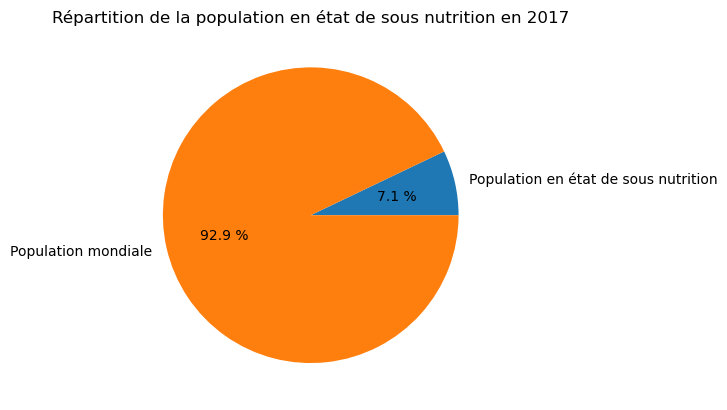

In [59]:
#Création du pie chart

popu_mondiale = popu_sous_nutri_2017['Population'].sum()
popu_mondiale_OK = popu_mondiale - Sum_popu_sous_nutri

plt.pie([Sum_popu_sous_nutri, popu_mondiale_OK], labels=['Population en état de sous nutrition', 'Population mondiale'], autopct='%.1f %%')

plt.title('Répartition de la population en état de sous nutrition en 2017')
plt.savefig('population en sous nutrition.png')
plt.show()

# <a id="nombre_theorique_personnes"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [60]:
#Combien mange en moyenne un être humain ? 2400 kcal/jour 
# Source => site OMS et ANSES
# https://www.who.int/fr/news-room/fact-sheets/detail/healthy-diet
# https://www.cerin.org/articles/references-nutritionnelles-pour-les-adultes/

In [61]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

dispo_alimentaire_population_2017 = pd.merge(pop_filtre_2017, dispo_alimentaire, how= 'left', on='Zone')

In [62]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement

dispo_alimentaire_population_2017['dispo_kcal'] = dispo_alimentaire_population_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_population_2017['Population']

In [63]:
#Calcul de la disponibilité alimentaire mondiale

dispo_kcal_monde = dispo_alimentaire_population_2017['dispo_kcal'].sum()

print('La disponibilité alimentaire mondiale(en kcal/jour) est de:', dispo_kcal_monde)

La disponibilité alimentaire mondiale(en kcal/jour) est de: 20918984627331.0


In [64]:
#Calcul du nombre d'humains pouvant être nourris

Nombre_humains_nourris = round(dispo_kcal_monde / 2400, 2)

print("Le nombre théorique d'humains pouvant être nourris est de:", Nombre_humains_nourris)

Le nombre théorique d'humains pouvant être nourris est de: 8716243594.72


In [65]:
#pourcentage population pouvant etre nourris

pourcentage_humains_nourris_total = round((Nombre_humains_nourris / population_mondiale_2017) * 100, 2)

print("Le nombre d'humains pouvant être nourris avec la production mondiale est de:", pourcentage_humains_nourris_total)

Le nombre d'humains pouvant être nourris avec la production mondiale est de: 115.48


# <a id="nombre_theorique_personnes_vegetaux)"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [66]:
#Transfert des données avec les végétaux dans un nouveau dataframe

dispo_al_pop_veg = dispo_alimentaire_population_2017[dispo_alimentaire_population_2017['Origine']== 'vegetale']

In [67]:
#Calcul du nombre de kcal disponible pour les végétaux

dispo_kcal_monde_veg = dispo_al_pop_veg['dispo_kcal'].sum()

print('La disponibilité alimentaire mondiale pour les végétaux(en kcal/an) est de:', dispo_kcal_monde_veg)


La disponibilité alimentaire mondiale pour les végétaux(en kcal/an) est de: 17260764211501.0


In [68]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

Nombre_humains_nourris_veg = round(dispo_kcal_monde_veg / 2400, 2)

print("Le nombre d'humains pouvant être nourris avec les végétaux est de:", Nombre_humains_nourris_veg)


Le nombre d'humains pouvant être nourris avec les végétaux est de: 7191985088.13


In [69]:
#pourcentage population pouvant etre nourris uniquement avec des vegetaux

pourcentage_humains_nourris_veg = round((Nombre_humains_nourris_veg / population_mondiale_2017) * 100, 2)
print("Le nombre d'humains pouvant être nourris uniquement avec des produits végétaux est de:", pourcentage_humains_nourris_veg)

Le nombre d'humains pouvant être nourris uniquement avec des produits végétaux est de: 95.28


# <a id="utilisation_dispo_interieure"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [70]:
#Création des variables

total_dispo_interieure = dispo_alimentaire['Disponibilité intérieure'].sum()
total_nourriture = dispo_alimentaire['Nourriture'].sum()
total_pertes = dispo_alimentaire['Pertes'].sum()
total_aliments_animaux = dispo_alimentaire['Aliments pour animaux'].sum()
total_semences = dispo_alimentaire['Semences'].sum()
total_traitement = dispo_alimentaire['Traitement'].sum()
total_autres_utilisations = dispo_alimentaire['Autres Utilisations'].sum()



In [71]:
# Création d'un dictionnaire pour stocker les catégories et leurs totaux

categories = {
    'Nourriture': total_nourriture,
    'Pertes': total_pertes,
    'Aliments pour animaux': total_aliments_animaux,
    'Semences': total_semences,
    'Traitement': total_traitement,
    'Autres Utilisations': total_autres_utilisations
}

# Calcul des pourcentages pour chaque catégorie en utilisant une boucle for

pourcentages = {}
for categorie, total in categories.items():
    pourcentage = round((total / total_dispo_interieure) * 100, 2)
    pourcentages[categorie] = pourcentage


print('La disponibilité intérieure mondiale est répartie comme suit:')
for categorie, pourcentage in pourcentages.items():
    print(f"{categorie}: {pourcentage}%")

La disponibilité intérieure mondiale est répartie comme suit:
Nourriture: 49.51%
Pertes: 4.61%
Aliments pour animaux: 13.24%
Semences: 1.57%
Traitement: 22.38%
Autres Utilisations: 8.78%


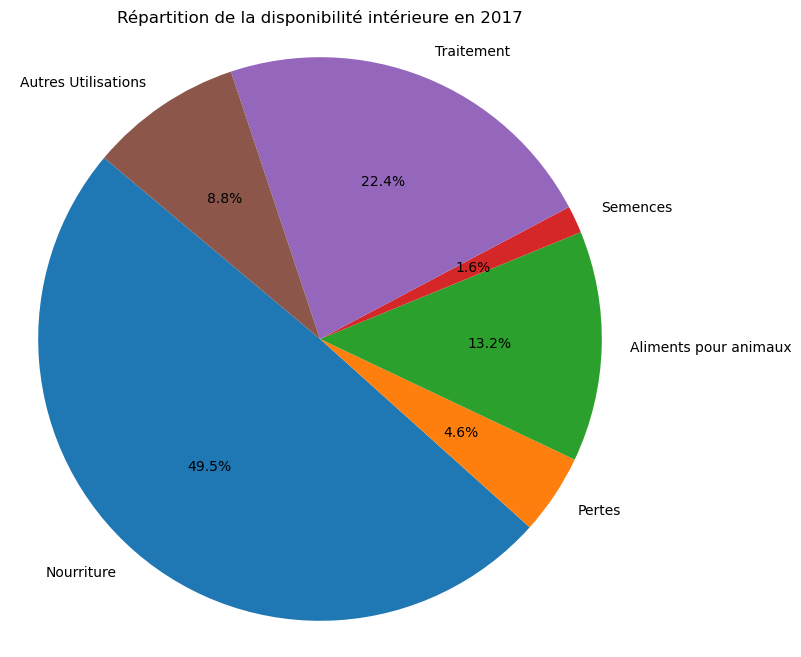

In [72]:
# Création du pie chart

plt.figure(figsize=(8, 8))
plt.pie(pourcentages.values(), labels=pourcentages.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Répartition de la disponibilité intérieure en 2017')
plt.axis('equal')  # Assure que le pie chart est dessiné en cercle

plt.savefig('repartition_dispo_interieure_pie_chart.png')
plt.show()

# <a id="utilisation_cereales"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [73]:
#Création d'une liste avec toutes les variables

dispo_alimentaire_population_2017['Produit'].unique().tolist()
céréales = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Avoine', 'Seigle', 'Sorgho', 'Riz (Eq Blanchi)']

In [74]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispo_cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(céréales)]

dispo_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0


In [75]:
#Vérification du nouveau data frame

dispo_cereales['Produit'].unique()

array(['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge',
       'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho'], dtype=object)

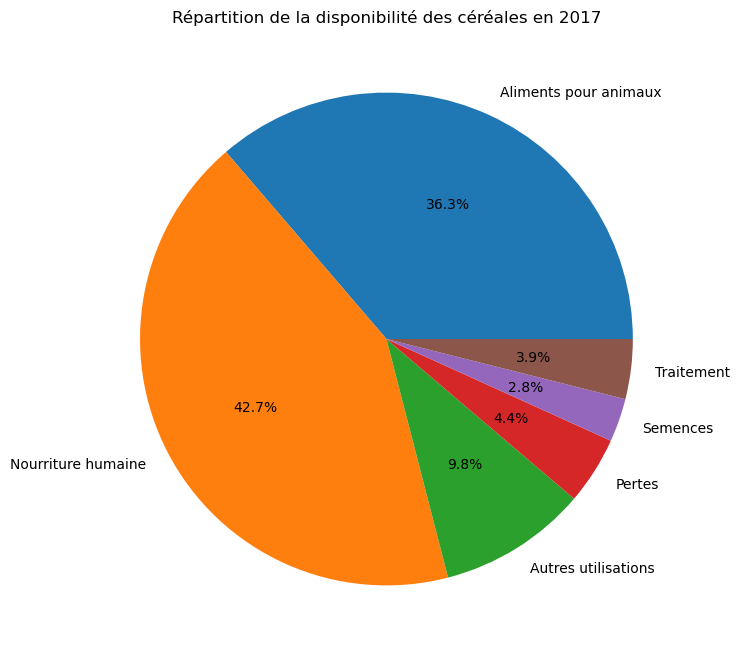

In [76]:
#Affichage de la proportion d'alimentation animale

dispo_cereales_totale = dispo_cereales['Disponibilité intérieure'].sum()
dispo_cereales_alim_ani = dispo_cereales['Aliments pour animaux'].sum()
dispo_cereales_autre = dispo_cereales['Autres Utilisations'].sum()
dispo_cereales_nourriture = dispo_cereales['Nourriture'].sum()
dispo_cereales_perte = dispo_cereales['Pertes'].sum()
dispo_cereales_semences = dispo_cereales['Semences'].sum()
dispo_cereales_traitement = dispo_cereales['Traitement'].sum()

proportions = [dispo_cereales_alim_ani / dispo_cereales_totale, dispo_cereales_nourriture / dispo_cereales_totale, dispo_cereales_autre / dispo_cereales_totale, dispo_cereales_perte / dispo_cereales_totale, dispo_cereales_semences / dispo_cereales_totale, dispo_cereales_traitement /dispo_cereales_totale]

plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=['Aliments pour animaux', 'Nourriture humaine', 'Autres utilisations', 'Pertes', 'Semences', 'Traitement'], autopct='%1.1f%%')
plt.title('Répartition de la disponibilité des céréales en 2017')
plt.savefig('utilisatiob des cereales.png')
plt.show()

# <a id="proportion_forte_sous_nutrition"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [77]:
#Création de la colonne proportion par pays

popu_sous_nutri_2017['proportion par pays'] = round((popu_sous_nutri_2017['sous_nutrition'] / popu_sous_nutri_2017['Population']) * 100, 2)

In [78]:
#affichage après trie des 10 pires pays

Top_10_sous_nutri = popu_sous_nutri_2017.nlargest(10, 'proportion par pays')
Top_10_sous_nutri.head(10)

,Zone,Année,Population,sous_nutrition,proportion par pays
87,Haïti,2017,10982366.0,5300000.0,48.26
181,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
128,Madagascar,2017,25570512.0,10500000.0,41.06
122,Libéria,2017,4702226.0,1800000.0,38.28
119,Lesotho,2017,2091534.0,800000.0,38.25
216,Tchad,2017,15016753.0,5700000.0,37.96
186,Rwanda,2017,11980961.0,4200000.0,35.06
145,Mozambique,2017,28649018.0,9400000.0,32.81
219,Timor-Leste,2017,1243258.0,400000.0,32.17
0,Afghanistan,2017,36296113.0,10500000.0,28.93


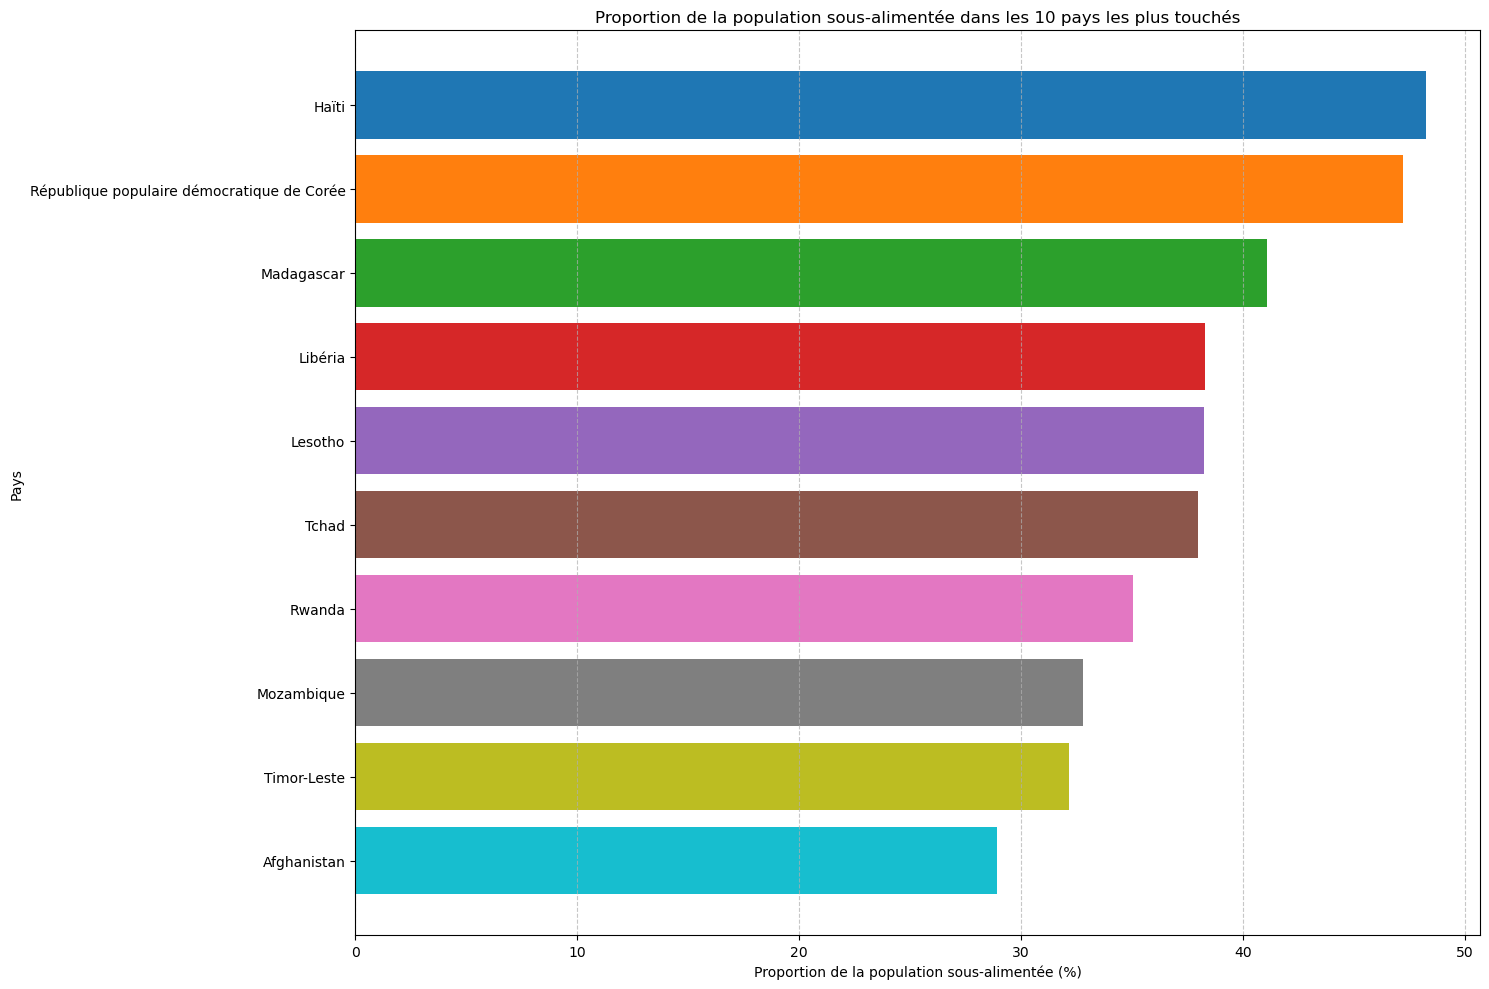

In [79]:
#Création du diagramme à barres

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(15, 10))  

plt.barh(y=Top_10_sous_nutri['Zone'], width=Top_10_sous_nutri['proportion par pays'], color=colors) 
plt.xlabel('Proportion de la population sous-alimentée (%)')
plt.ylabel('Pays')
plt.title('Proportion de la population sous-alimentée dans les 10 pays les plus touchés')
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.gca().invert_yaxis()

plt.savefig('pays avec le plus de sous nutrition.png')
plt.show()


# <a id="pays_plus_aide"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [80]:
#calcul du total de l'aide alimentaire par pays

montant_total_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum()

print(montant_total_par_pays)

Zone
Afghanistan     185452000
Algérie          81114000
Angola            5014000
Bangladesh      348188000
Bhoutan           2666000
                  ...    
Zambie            3026000
Zimbabwe         62570000
Égypte            1122000
Équateur          1362000
Éthiopie       1381294000
Name: Valeur, Length: 76, dtype: int64


In [81]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire

top_10_pays = montant_total_par_pays.nlargest(10)

print("Les 10 pays qui ont bénéficié le plus de l'aide alimentaire sont:", top_10_pays)

Les 10 pays qui ont bénéficié le plus de l'aide alimentaire sont: Zone
République arabe syrienne           1858943000
Éthiopie                            1381294000
Yémen                               1206484000
Soudan du Sud                        695248000
Soudan                               669784000
Kenya                                552836000
Bangladesh                           348188000
Somalie                              292678000
République démocratique du Congo     288502000
Niger                                276344000
Name: Valeur, dtype: int64


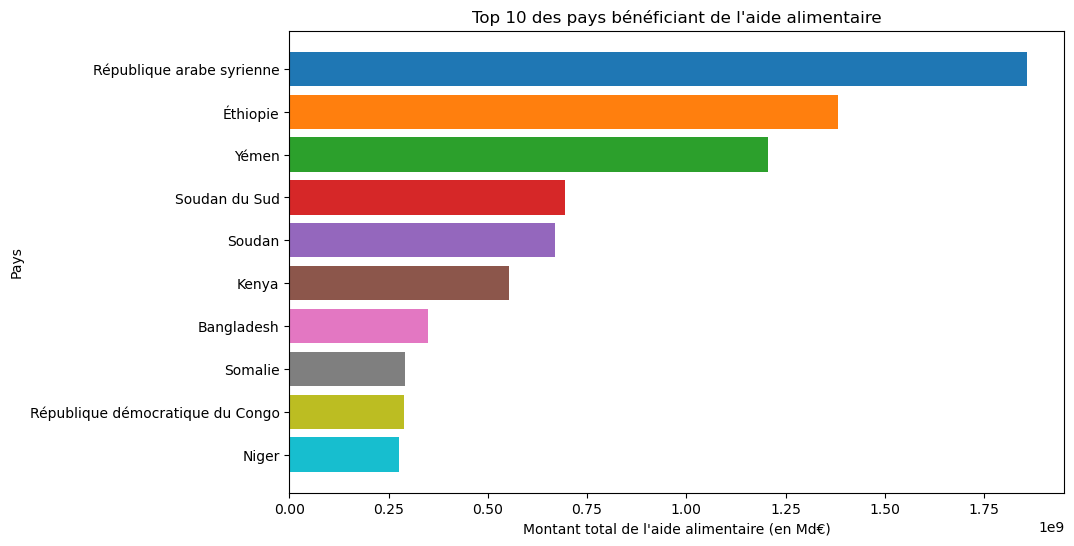

In [82]:
#Création d'un diagramme à barres horizontales

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_pays.index, top_10_pays.values, color=colors) 


plt.xlabel('Montant total de l\'aide alimentaire (en Md€)')
plt.ylabel('Pays')
plt.title('Top 10 des pays bénéficiant de l\'aide alimentaire')
plt.gca().invert_yaxis()

plt.savefig('TOP 10 pays aide alimentaire.png')
plt.show()

# <a id="evolution_aide_alimentaire"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [83]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 

aide_alimentaire_filtre = aide_alimentaire[['Zone', 'Année', 'Valeur']]
aide_alimentaire_filtre_grouped = aide_alimentaire_filtre.groupby(['Zone', 'Année']).sum()

print(aide_alimentaire_filtre_grouped)


                      Valeur
Zone        Année           
Afghanistan 2013   128238000
            2014    57214000
Algérie     2013    35234000
            2014    18980000
            2015    17424000
...                      ...
Égypte      2013     1122000
Équateur    2013     1362000
Éthiopie    2013   591404000
            2014   586624000
            2015   203266000

[228 rows x 1 columns]


In [84]:
#Les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

top_5_pays = montant_total_par_pays.nlargest(5)
top_5_pays

Zone
République arabe syrienne    1858943000
Éthiopie                     1381294000
Yémen                        1206484000
Soudan du Sud                 695248000
Soudan                        669784000
Name: Valeur, dtype: int64

In [85]:
#Création d'une liste avec ces 5 pays

liste_top_5_pays = top_5_pays.index.tolist()

print(liste_top_5_pays)

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


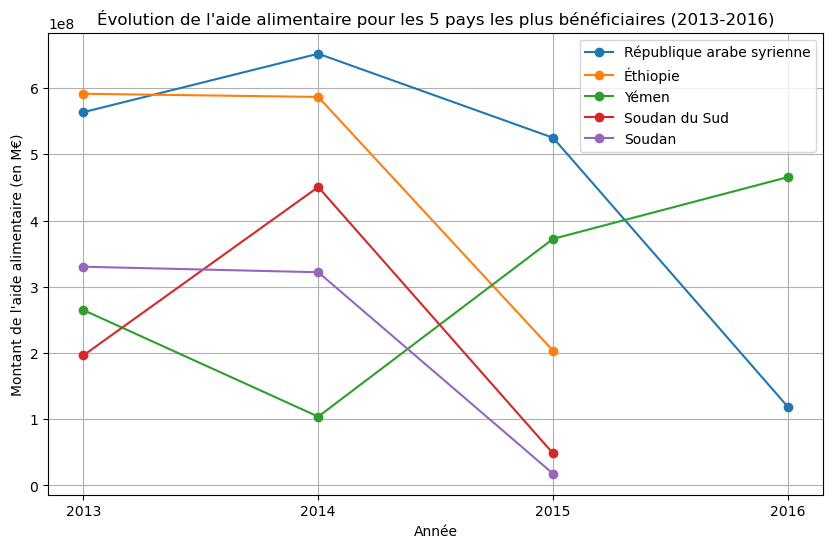

In [86]:
#Sélectionner les données des cinq pays sélectionnés
data_top_5 = aide_alimentaire_filtre_grouped.loc[top_5_pays.index]

#Réinitialiser l'index pour pouvoir accéder aux noms des pays comme une colonne
data_top_5.reset_index(inplace=True)

#Créer un graphique en courbe pour chaque pays

plt.figure(figsize=(10, 6))
for pays in top_5_pays.index:
    data_pays = data_top_5[data_top_5['Zone'] == pays]
    plt.plot(data_pays['Année'], data_pays['Valeur'], marker='o', label=pays)

plt.xlabel('Année')
plt.ylabel('Montant de l\'aide alimentaire (en M€)')
plt.title('Évolution de l\'aide alimentaire pour les 5 pays les plus bénéficiaires (2013-2016)')
plt.xticks(range(2013, 2017, 1))
plt.legend()
plt.grid(True)

plt.savefig('Evolution_aide_alimentaire.png')
plt.show()

# <a id="moins_dispo_habitant"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [87]:
#Création d'un nouveau dataframe avec les colonnes pertinentes du df dispo_alimentaire

dispo_alimentaire_filtre = dispo_alimentaire[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alimentaire_kcal_pays = dispo_alimentaire_filtre.groupby('Zone').sum()

In [88]:
#Filtre sur les 10 pays ayant la plus faible disponibilité alimentaire

top_10_pays_negatif_kcal = dispo_alimentaire_kcal_pays.nsmallest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')
print("Les 10 pays ayant le moins de disponibilité alimentaire par habitants sont:", top_10_pays_negatif_kcal)


Les 10 pays ayant le moins de disponibilité alimentaire par habitants sont:                                             Disponibilité alimentaire (Kcal/personne/jour)
Zone                                                                                      
République centrafricaine                                                           1879.0
Zambie                                                                              1924.0
Madagascar                                                                          2056.0
Afghanistan                                                                         2087.0
Haïti                                                                               2089.0
République populaire démocratique de Corée                                          2093.0
Tchad                                                                               2109.0
Zimbabwe                                                                            2113.0
Ouganda       

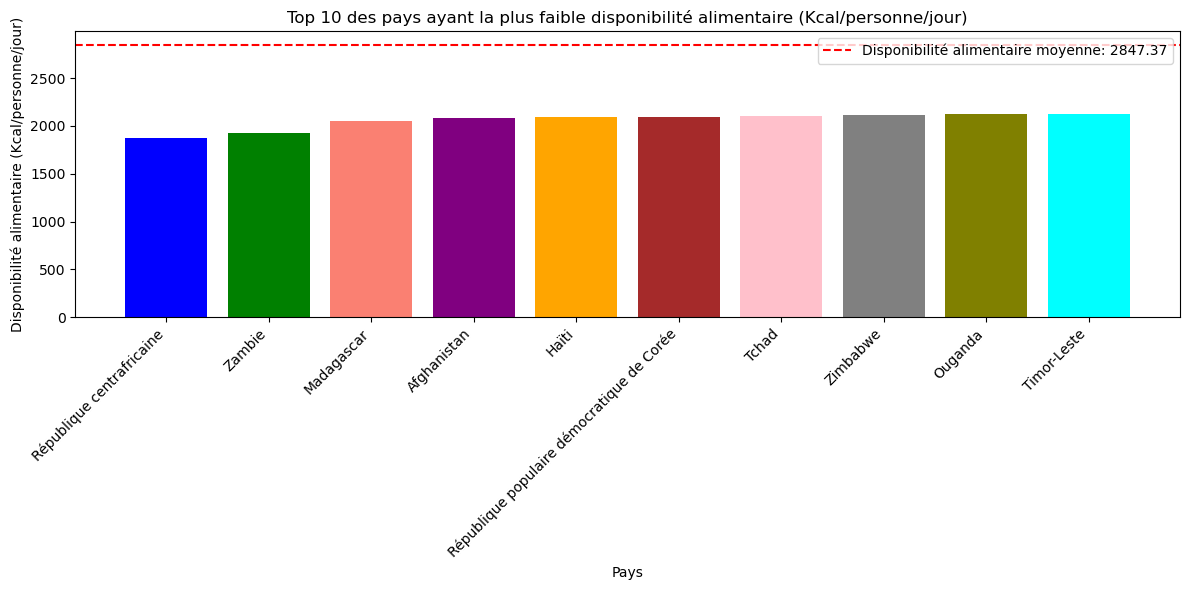

In [89]:
# Calculer la disponibilité alimentaire moyenne des pays

dispo_alimentaire_moyenne = dispo_alimentaire_kcal_pays['Disponibilité alimentaire (Kcal/personne/jour)'].mean()

# Créer le diagramme à barres

plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'salmon', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.bar(range(len(top_10_pays_negatif_kcal)), top_10_pays_negatif_kcal['Disponibilité alimentaire (Kcal/personne/jour)'], color=colors)
plt.axhline(y=dispo_alimentaire_moyenne, color='red', linestyle='--', label=f'Disponibilité alimentaire moyenne: {dispo_alimentaire_moyenne:.2f}')
plt.title('Top 10 des pays ayant la plus faible disponibilité alimentaire (Kcal/personne/jour)')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xticks(range(len(top_10_pays_negatif_kcal)), top_10_pays_negatif_kcal.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('TOP 10 pays dispo alimentaire faible.png')

plt.show()

# <a id="plus_dispo_habitant"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [90]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 

top_10_pays_kcal = dispo_alimentaire_kcal_pays.nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')
print(top_10_pays_kcal)

                       Disponibilité alimentaire (Kcal/personne/jour)
Zone                                                                 
Autriche                                                       3770.0
Belgique                                                       3737.0
Turquie                                                        3708.0
États-Unis d'Amérique                                          3682.0
Israël                                                         3610.0
Irlande                                                        3602.0
Italie                                                         3578.0
Luxembourg                                                     3540.0
Égypte                                                         3518.0
Allemagne                                                      3503.0


<Figure size 1200x600 with 0 Axes>

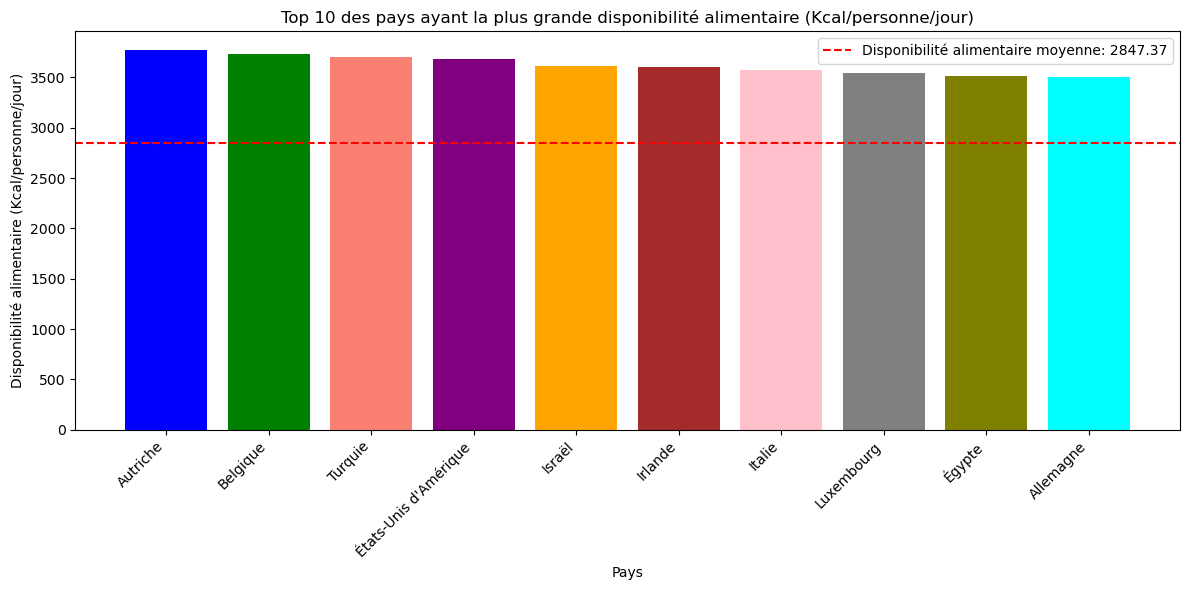

In [91]:
# Créer le diagramme à barres

plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'salmon', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_10_pays_kcal)), top_10_pays_kcal['Disponibilité alimentaire (Kcal/personne/jour)'], color=colors)
plt.axhline(y=dispo_alimentaire_moyenne, color='red', linestyle='--', label=f'Disponibilité alimentaire moyenne: {dispo_alimentaire_moyenne:.2f}')
plt.title('Top 10 des pays ayant la plus grande disponibilité alimentaire (Kcal/personne/jour)')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.xticks(range(len(top_10_pays_kcal)), top_10_pays_kcal.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('TOP 10 pays dispo alimentaire max.png')

plt.show()

# <a id="exemple_thailande_manioc"></a>
<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [92]:
#création d'un dataframe avec uniquement la Thaïlande 

dispo_alimentaire_thailande = dispo_alimentaire.loc[(dispo_alimentaire['Zone']== 'Thaïlande')]


In [93]:
#Calcul de la sous nutrition en Thaïlande

popu_sous_nutri_thailande_2017 = popu_sous_nutri_2017.loc[(popu_sous_nutri_2017['Zone']== 'Thaïlande') & (popu_sous_nutri_2017['Année']==2017)]

print(popu_sous_nutri_thailande_2017)


          Zone  Année  Population  sous_nutrition  proportion par pays
218  Thaïlande   2017  69209810.0       6200000.0                 8.96


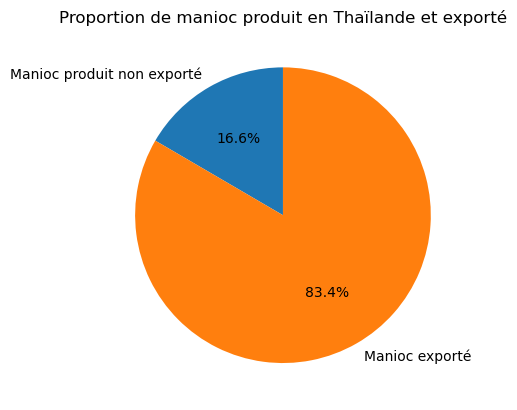

In [94]:
# On calcule la proportion de manioc exportée en fonction de la proportion de manioc produit

dispo_alimentaire_thailande_manioc = dispo_alimentaire_thailande.loc[dispo_alimentaire_thailande['Produit']=='Manioc']

dispo_interieur_manioc = dispo_alimentaire_thailande_manioc['Disponibilité intérieure'].sum()
exportation_manioc = dispo_alimentaire_thailande_manioc['Exportations - Quantité'].sum()
importation_manioc = dispo_alimentaire_thailande_manioc['Importations - Quantité'].sum()
production_manioc = dispo_alimentaire_thailande_manioc['Production'].sum()

proportion_exportation = exportation_manioc / production_manioc
proportion_importation = importation_manioc / production_manioc

proportion_exporte = exportation_manioc / production_manioc
proportion_produit = 1 - proportion_exporte


labels = ['Manioc produit non exporté', 'Manioc exporté']

sizes = [proportion_produit, proportion_exporte]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion de manioc produit en Thaïlande et exporté')
plt.savefig('proportion manioc exporté thailande.png')

plt.show()

In [95]:
#Disponibilité par habitant en Thaïlande

dispo_alimentaire_kcal_thailande = dispo_alimentaire_thailande['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
print('La disponibilité alimentaire (en Kcal/personne/jour) en Thaïlande est de:', dispo_alimentaire_kcal_thailande)

La disponibilité alimentaire (en Kcal/personne/jour) en Thaïlande est de: 2785.0


In [96]:
#Proportion de la population en etat de sous nutrition en Thaïlande

popu_sous_nutri_thailande = popu_sous_nutri_2017.loc[popu_sous_nutri_2017['Zone']=='Thaïlande']
proportion_popu_sous_nutri_thailande = popu_sous_nutri_thailande['proportion par pays'].sum()

print('La part de population en état de sous nutrition en Thailande est de:', proportion_popu_sous_nutri_thailande,'%')

La part de population en état de sous nutrition en Thailande est de: 8.96 %


# <a id="etape4"></a>
<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse complémentaires</h2>
</div>

In [97]:
#Focus sur la dispo alimentaire de l'Autriche avec un filtre

dispo_alimentaire_autriche = dispo_alimentaire.loc[(dispo_alimentaire['Zone']== 'Autriche')]

print(dispo_alimentaire_autriche)

          Zone                 Produit   Origine  Aliments pour animaux  \
978   Autriche        Abats Comestible   animale                    0.0   
979   Autriche         Agrumes, Autres  vegetale                    0.0   
980   Autriche  Alcool, non Comestible  vegetale                    0.0   
981   Autriche   Aliments pour enfants  vegetale                    0.0   
982   Autriche                  Ananas  vegetale                    0.0   
...        ...                     ...       ...                    ...   
1068  Autriche        Viande de Suides   animale                    0.0   
1069  Autriche     Viande de Volailles   animale                    0.0   
1070  Autriche           Viande, Autre   animale                    0.0   
1071  Autriche                     Vin  vegetale                    0.0   
1072  Autriche          Épices, Autres  vegetale                    0.0   

      Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
978                   

In [98]:
#Quel est l'aliment avec la part de disponibilité alimentaire Kcal/personne/jour la plus importante pour l'Autriche?

dispo_alimentaire_autriche.loc[dispo_alimentaire_autriche['Disponibilité alimentaire (Kcal/personne/jour)']== 645]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
990,Autriche,Blé,vegetale,467000000.0,58000000.0,645.0,81.1,3.13,20.97,1.320000e+09,962000000.0,1.031000e+09,689000000.0,40000000.0,1.598000e+09,55000000.0,11000000.0,-347000000.0


In [99]:
#Vérification des valeurs négatives trouvés lors de l'analyse exploratoire du dataframe dispo_alimentaire

dispo_alimentaire.loc[dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']<0]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7029,Japon,Avoine,vegetale,50000000.0,1000000.0,-21.0,-1.93,-0.03,-0.37,-159000000.0,-41000000.0,-201000000.0,-246000000.0,0.0,0.0,0.0,35000000.0,0.0


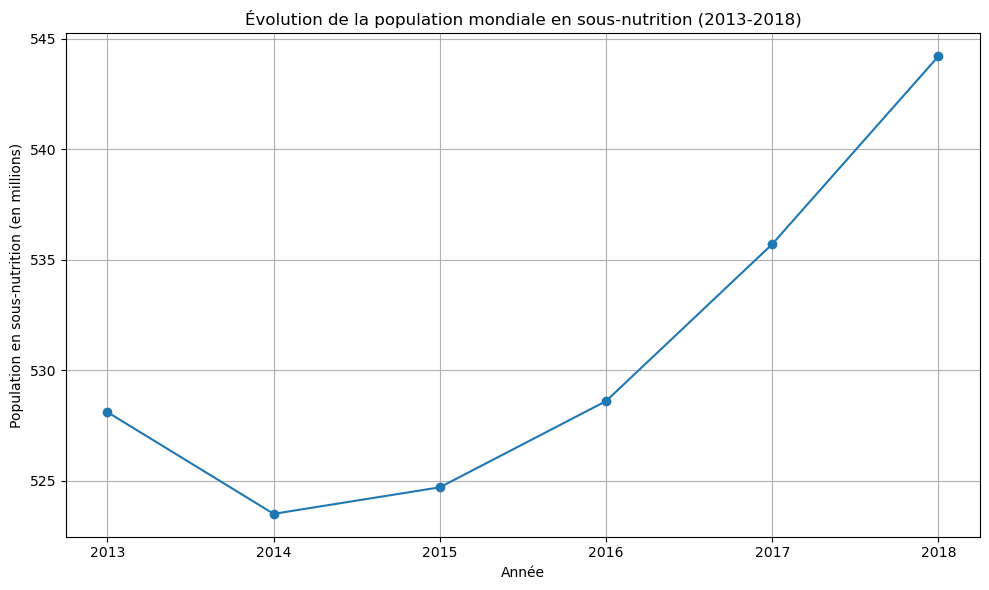

In [100]:
#Comparaison entre l'évolution de la part de population en état de sous nutrition et le montant de l'aide alimentairer mondiale sur la même periode

sous_nutrition_par_an = sous_nutrition.groupby('Année')['sous_nutrition'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(sous_nutrition_par_an['Année'], sous_nutrition_par_an['sous_nutrition'] / 1e6, marker='o', linestyle='-')  # Diviser par 1 million pour obtenir en milliards
plt.title('Évolution de la population mondiale en sous-nutrition (2013-2018)')
plt.xlabel('Année')
plt.ylabel('Population en sous-nutrition (en millions)')
plt.grid(True)
plt.xticks(sous_nutrition_par_an['Année'])
plt.tight_layout()

plt.savefig('evolution de la population en sous nutrition.png')
plt.show()


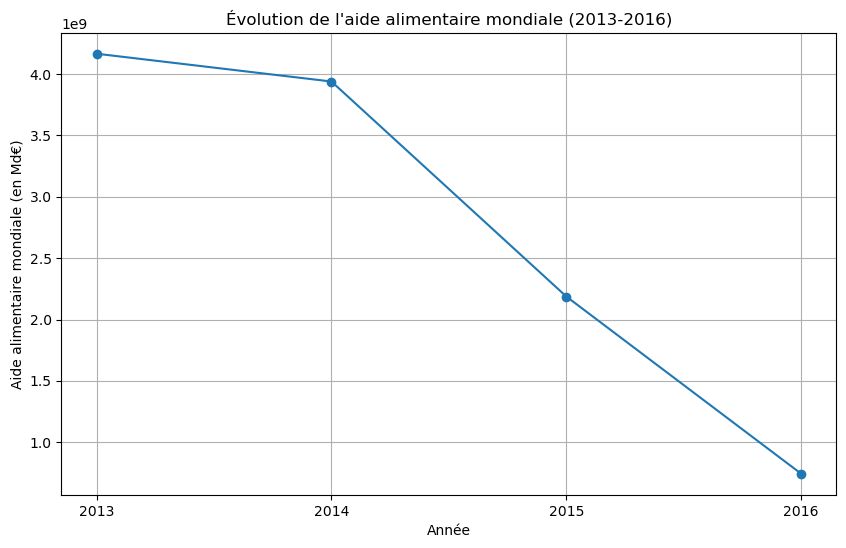

In [101]:
#Calcul du montant annuel de l'aide alimentaire mondiale
aide_alimentaire_filtre_année_grouped = aide_alimentaire_filtre_grouped.groupby('Année').sum()

#Création d'un graphique montrant l'évolution de l'aide alimentaire mondiale entre 2013 et 2016
plt.figure(figsize=(10, 6))
plt.plot(aide_alimentaire_filtre_année_grouped.index, aide_alimentaire_filtre_année_grouped.values, marker='o', linestyle='-')
plt.xlabel('Année')
plt.ylabel('Aide alimentaire mondiale (en Md€)')
plt.title('Évolution de l\'aide alimentaire mondiale (2013-2016)')
plt.xticks(range(2013, 2017, 1))

plt.grid(True)

plt.savefig('evolution de l aide alimentaire mondiale.png')
plt.show()